This notebook shows more operations that can be performed on a sudoku configuration

In [1]:
from sudoku import Sudoku
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Copy

Create a independent copy of a sudoku configuration

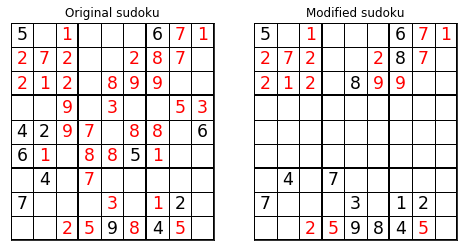

In [2]:
a = Sudoku.random()
b = a.copy()

for k in range(0, 3):
    del b.squares[1, k]

plt.subplots(1, 2, figsize=(8, 4))
plt.subplot(121)
plt.title('Original sudoku')
a.draw()
plt.subplot(122)
plt.title('Modified sudoku')
b.draw()

## Clear

Remove every cell in the sudoku

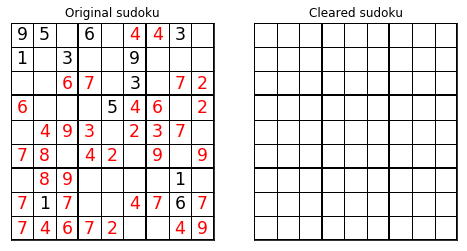

In [3]:
a = Sudoku.random()
b = a.copy()
b.clear()

plt.subplots(1, 2, figsize=(8, 4))
plt.subplot(121)
plt.title('Original sudoku')
a.draw()
plt.subplot(122)
plt.title('Cleared sudoku')
b.draw()

## Flatten

Get a list of all sudoku cells in a flattened array

In [4]:
cells = Sudoku.random().flatten()
print(cells)
print(cells.shape)

[6 6 2 0 0 3 1 0 0 5 0 8 0 2 3 3 6 4 0 0 0 5 2 0 6 7 2 5 9 1 3 1 9 0 5 1 3
 0 8 2 3 4 0 1 4 8 2 0 0 0 2 0 1 6 0 0 3 0 0 0 0 5 6 3 4 0 8 0 1 9 1 7 6 6
 9 8 6 0 0 4 0]
(81,)


## Empty & Full

Empty returns True if the sudoku has only empty cells whereas full is True when all cells are filled

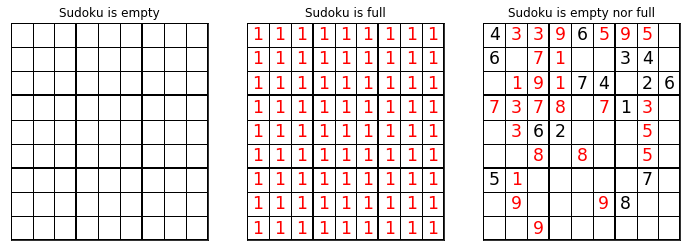

In [5]:
a = Sudoku()
b = Sudoku(1)
c = Sudoku.random()

plt.subplots(1, 3, figsize=(12, 4))
for j, sudoku in enumerate([a, b, c], 1):
    plt.subplot(1, 3, j)
    sudoku.draw()
    if sudoku.empty or sudoku.full:
        plt.title('Sudoku is {}'.format('empty' if sudoku.empty else 'full'))
    else:
        plt.title('Sudoku is empty nor full')

We can also calculate the amount of filled / empty cells in the sudoku

In [6]:
c.filled_cells_count

41

In [7]:
c.empty_cells_count

40

## Section operations

Most of the operations we did over the sudoku object can be also performed to a specific section

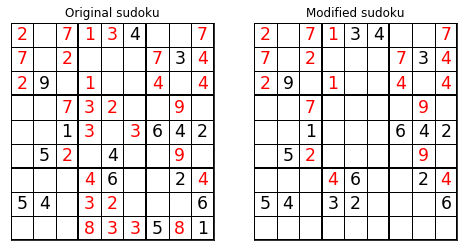

In [8]:
a = Sudoku.random()
b = a.copy()

b.rows[-1].clear()
b.squares[1, 1].clear()

plt.subplots(1, 2, figsize=(8, 4))
plt.subplot(121)
plt.title('Original sudoku')
a.draw()
plt.subplot(122)
plt.title('Modified sudoku')
b.draw()

In [9]:
for i, row in enumerate(b.rows):
    if row.empty:
        print('Row {} is empty'.format(i))
    
for j, col in enumerate(b.columns):
    if col.full:
        print('Column {} is full'.format(j))

print()
for k, square in enumerate(b.squares):
    print('Square {} has {} numbers'.format(k, square.filled_cells_count))

Row 8 is empty

Square 0 has 6 numbers
Square 1 has 4 numbers
Square 2 has 6 numbers
Square 3 has 4 numbers
Square 4 has 0 numbers
Square 5 has 5 numbers
Square 6 has 2 numbers
Square 7 has 4 numbers
Square 8 has 3 numbers


## Numbers

There are few methods to help us in the task of solving sudokus that can be useful

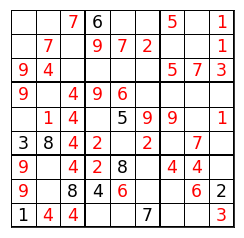

In [10]:
sudoku = Sudoku.random()
sudoku.show(figsize=(4, 4))

the 'numbers' property returns a list of all numbers that appears in the given section (or the whole sudoku). Note that 0 is not shown because it represents an empty cell

In [11]:
for k, square in enumerate(sudoku.squares):
    print('Numbers in the square {}: {}'.format(k, square.numbers))

Numbers in the square 0: [7 7 9 4]
Numbers in the square 1: [6 9 7 2]
Numbers in the square 2: [5 1 1 5 7 3]
Numbers in the square 3: [9 4 1 4 3 8 4]
Numbers in the square 4: [9 6 5 9 2 2]
Numbers in the square 5: [9 1 7]
Numbers in the square 6: [9 4 9 8 1 4 4]
Numbers in the square 7: [2 8 4 6 7]
Numbers in the square 8: [4 4 6 2 3]


But numbers could be shown twice if they are repeated. You can use 'unique_numbers' to retrieve non repeated number occurrences

In [12]:
for k, square in enumerate(sudoku.squares):
    print('Unique numbers in the square {}: {}'.format(k, list(square.unique_numbers)))

Unique numbers in the square 0: [9, 4, 7]
Unique numbers in the square 1: [9, 2, 6, 7]
Unique numbers in the square 2: [1, 3, 5, 7]
Unique numbers in the square 3: [1, 3, 4, 8, 9]
Unique numbers in the square 4: [9, 2, 5, 6]
Unique numbers in the square 5: [9, 1, 7]
Unique numbers in the square 6: [8, 9, 4, 1]
Unique numbers in the square 7: [2, 4, 6, 7, 8]
Unique numbers in the square 8: [2, 3, 4, 6]


Note that 'unique_numbers' returns a frozenset. We converted it to list to print it

Additionally, you have 'remaining_numbers' property, which also retrieves a frozenset, and returns all the numbers that doesnt appear. <br/>
Is a shorthand of frozenset(range(1, 10)) - unique_numbers

In [13]:
for k, square in enumerate(sudoku.squares):
    print('Remaining numbers in the square {}: {}'.format(k, list(square.remaining_numbers)))

Remaining numbers in the square 0: [1, 2, 3, 5, 6, 8]
Remaining numbers in the square 1: [1, 3, 4, 5, 8]
Remaining numbers in the square 2: [2, 4, 6, 8, 9]
Remaining numbers in the square 3: [2, 5, 6, 7]
Remaining numbers in the square 4: [1, 3, 4, 7, 8]
Remaining numbers in the square 5: [2, 3, 4, 5, 6, 8]
Remaining numbers in the square 6: [2, 3, 5, 6, 7]
Remaining numbers in the square 7: [1, 3, 5, 9]
Remaining numbers in the square 8: [1, 5, 7, 8, 9]


Also individual sudoku cells have the property 'remaining_numbers'. It returns a frozenset with all the numbers we can put in cell without conflicting the neighbour cells (numbers that dont appear in its row, column or square) <br/>
If the cell is not empty, returns an empty frozenset

In [14]:
cell = sudoku.filled_cells[np.random.choice(sudoku.filled_cells_count)]
print('Remaining numbers for cell at ({}, {}) with value {}: {}'.format(
    cell.row_index, cell.col_index, cell, list(cell.remaining_numbers)))

cell = sudoku.empty_cells[np.random.choice(sudoku.empty_cells_count)]
print('Remaining numbers for cell at ({}, {}) with value {}: {}'.format(
    cell.row_index, cell.col_index, cell, list(cell.remaining_numbers)))

Remaining numbers for cell at (8, 8) with value 3: []
Remaining numbers for cell at (0, 4) with value 0: [3, 4]
